In [1]:
# El primer analisis se realizara utilizando KMeans. Este metodo buscara agrupar minimizando la distancia que exista
# entre el centro de cada grupo, con sus respectivos miembros.

In [2]:
# Importamos los datos
with open("objetos.txt") as txt:
    lines = txt.read().split('\n\n')

In [3]:
# Verificamos que no hayan lineas vacias
for i in lines:
    if i.isspace():
        print('!')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans
import time

In [5]:
# Creamos una instancia de TfidfVectorizer, que permitira calcular la frecuencia relativa de cada palabra con respecto a
# el total de entradas. El atributo max_df = 0.9 se agrega para no incluir palabras que se repitan en el 90% de las entradas
# (como podria ser el caso de conectores como 'a' o 'de'). min_df = 2 se agrega para incluir palabras que se repitan al menos
# un minimo de dos veces.
# Una alternativa a max_df seria incluir un listado de palabras en stop_words, sin embargo, dejaremos esto en blanco.
vectorizer = TfidfVectorizer(max_df=0.9,min_df=2)

In [6]:
# Realizamos la transformacion a una matriz tipo sparse
X = vectorizer.fit_transform(lines)

In [7]:
# Para tratar de obtener el mejor valor de k, trataremos de iterar para k=1:40 y observaremos si existe algun valor
# de k en que se produzca un salto en el valor de SSE (sum squared error o la suma cuadrada de los errores)
k = range(1,41)
sse = []

In [8]:
# IMPORTANTE: Demora por lo menos 15-20 min en ejecutarse, por la cantidad de iteraciones que debe realizar.
# El codigo genera unicamente los datos para el grafico de SSE vs K, no es necesario ejecutarlo para el resto
start = time.time()

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=7)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

end = time.time()
print(end-start)

1007.1794521808624


In [9]:
import matplotlib.pyplot as plt

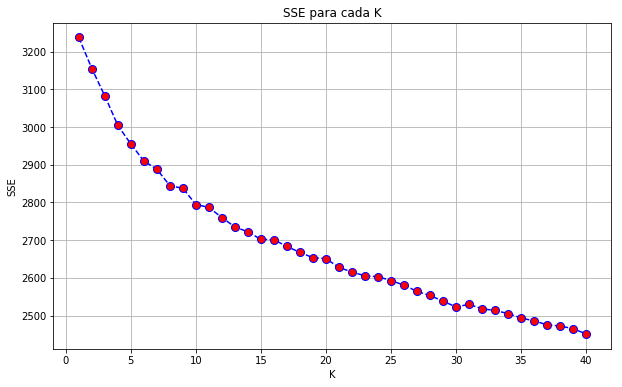

In [10]:
plt.figure(figsize=(10,6))
plt.plot(k,sse,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=8)
plt.title('SSE para cada K')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [11]:
# En el gráfico no se observa un cambio pronunciado en el error al aumentar el valor de k, por lo que
# no es tan simple utilizar el criterio del "codo".

# Se probará con k = 30, donde se observa un aumento de error en vez de descenso

In [12]:
# Se define k = 30, ademas de definir random_state=7 para efectos de replicar los resultados
k_chosen = 30
kmeans = KMeans(n_clusters=k_chosen,random_state=7)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [13]:
classification = []

for i in lines:
    cluster = kmeans.predict(vectorizer.transform([i]))
    classification.append(cluster[0])

In [14]:
import pandas as pd

In [15]:
# Se crea un DataFrame incluyendo el indice de la clasificacion otorgada
df = pd.DataFrame()
df['Texto'] = lines
df['Grupo'] = classification

In [16]:
# Funcion para imprimir el texto asociado a la clasificacion realizada
def print_lines(db,num=0):
    df = db[db['Grupo']==num]['Texto']
    for i in range(0,len(df)):
        print(df.iloc[i])

In [17]:
# print_lines(df,4)

In [18]:
# Almacenar las palabras claves que designan a cada grupo
centroides = kmeans.cluster_centers_.argsort() [:, ::-1]
palabras = vectorizer.get_feature_names()

In [19]:
# Imprimir las palabras
for i in range(k_chosen):
    print(f"Grupo {i}:"),
    for ind in centroides[i, :10]:
        print(f' {palabras[ind]}')

Grupo 0:
 de
 servicios
 en
 asesorías
 servicio
 actividades
 integrales
 seguridad
 asesorias
 belleza
Grupo 1:
 al
 por
 de
 mayor
 venta
 menor
 productos
 otros
 artículos
 en
Grupo 2:
 comida
 paso
 de
 establecimientos
 rapida
 al
 soda
 rápida
 bebidas
 preparada
Grupo 3:
 actividades
 otras
 servicios
 de
 esparcimiento
 deportivas
 agrícolas
 ganaderos
 act
 entretenimiento
Grupo 4:
 de
 en
 servicios
 la
 comercialización
 todo
 productos
 tipo
 general
 construcción
Grupo 5:
 carga
 carretera
 transporte
 por
 de
 transportes
 terrestre
 nacional
 venta
 obras
Grupo 6:
 fabricación
 de
 muebles
 prendas
 textiles
 productos
 piel
 vestir
 construcción
 otros
Grupo 7:
 alimentos
 menor
 de
 bebidas
 venta
 por
 tabacos
 especializados
 almc
 procesamiento
Grupo 8:
 actividades
 técnicas
 arquitectura
 ingeniería
 otras
 de
 construcción
 servicios
 profesionales
 prestadas
Grupo 9:
 automotores
 vehículos
 de
 mantenimiento
 reparación
 partes
 piezas
 venta
 accesorios
 mot

In [20]:
# Al revisar los resultados, vemos que para algunos casos, como el tipo 0, se mezclan considerablemente los giros
# de sociedades. De igual forma, trataremos de clasificarlos de la manera mas representativa acorde a las palabras
# que representan a cada grupo.

In [21]:
rep = {0:'Servicios Generales',1:'Venta de productos',2:'Venta de comida',3:'Servicios Generales',4:'Comercializacion de Productos',
       5:'Servicios de Transporte',6:'Fabricacion de productos',7:'Venta de alimentos y tabaco',8:'Arquitectura, Ingenieria y Construccion',
       9:'Servicio Automotriz',10:'Venta de productos',11:'Arquitectura, Ingenieria y Construccion',12:'Venta de productos',
       13:'Servicios de Transporte',14:'Servicios Informaticos',15:'Servicios de Administracion',16:'Servicios Generales',
       17:'Prestacion de Servicios',18:'Arquitectura, Ingenieria y Construccion',19:'Elaboracion de Alimentos',
       20:'Produccion de Eventos',21:'Actividades Inmobiliarias',22:'Venta de comida',23:'Servicios de Transporte',
       24:'Comercializadora Agricola',25:'Servicios Generales',26:'Servicios de Maquinaria',27:'Servicios de Asesoramiento',
       28:'Servicios de Salud',29:'Arquitectura, Ingenieria y Construccion'}

In [22]:
df['Nombre del Grupo'] = df['Grupo'].map(rep)

In [23]:
df.head()

,Texto,Grupo,Nombre del Grupo
0,"CONSTRUCCIÓN, ALQUILER DE OTROS TIPOS DE MAQUI...",21,Actividades Inmobiliarias
1,el servicio de turismo por todo el territorio ...,25,Servicios Generales
2,SALON DE BELLEZA.,0,Servicios Generales
3,"CURSOS ONLINE DE MUSICA, COCINA, CLASES DE MUS...",20,Produccion de Eventos
4,"el ejercicio de la actividad comercial,importa...",16,Servicios Generales


In [24]:
len(df['Nombre del Grupo'].unique())

19

In [25]:
# Vemos que, acorde a los grupos que se definieron utilizando este metodo, se identificaron 19 grupos diferentes.
# Sin embargo, el metodo utilizado de igual forma genero mezclas que no estan relacionadas, probaremos con otros metodos para
# observar si es posible obtener mejores resultados, utilizando nuevamente k = 20.

In [26]:
df.iloc[1]

Texto               el servicio de turismo por todo el territorio ...
Grupo                                                              25
Nombre del Grupo                                  Servicios Generales
Name: 1, dtype: object

In [27]:
# Observamos ahora cual es el grupo que se repitio con mas frecuencia

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

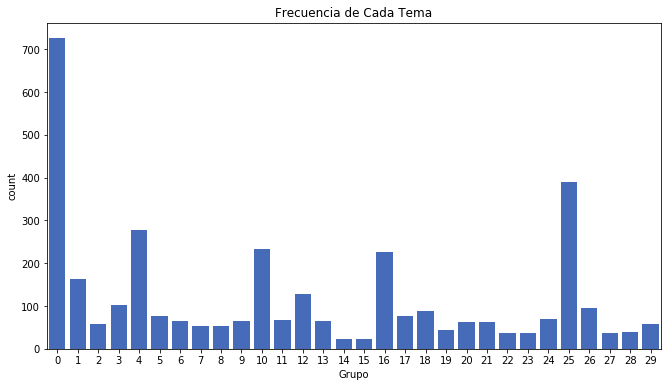

In [29]:
plt.figure(figsize=(11,6))
sns.countplot(x='Grupo',data=df,color="#3366cc")
plt.title("Frecuencia de Cada Tema")
plt.show()

In [30]:
# Vemos que el grupo 0 fue el mas asignado
print(rep[0])

Servicios Generales


In [31]:
# Dado que corresponde a Servicios Generales, implica que lo mas asignado en este caso fueron servicios no identificados
# de la mejor forma. Probaremos y reutilizaremos la informacion adquirida en este proceso para otros metodos de agrupacion